# Importamos el dataset desde Drive a Collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importamos las librerias necesarias para trabajar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


## Lectura del Dataset unificado

In [ ]:
import pandas as pd

# Cargar el dataset desde Drive
df = pd.read_csv("/content/drive/MyDrive/Ola_de_frio/df_diario_unificado.csv")

# Ver las primeras filas
print(df.head())

                                      name    datetime  tempmax  tempmin  \
0  Río Grande, Tierra del Fuego, Argentina  2021-01-01     19.2     10.0   
1  Río Grande, Tierra del Fuego, Argentina  2021-01-02     19.7     10.0   
2  Río Grande, Tierra del Fuego, Argentina  2021-01-03     16.1      5.0   
3  Río Grande, Tierra del Fuego, Argentina  2021-01-04     13.1      5.0   
4  Río Grande, Tierra del Fuego, Argentina  2021-01-05     18.0      6.2   

   temp  feelslikemax  feelslikemin  feelslike   dew  humidity  ...  \
0  14.2          19.2          10.0       14.2  11.7      85.7  ...   
1  14.8          19.7          10.0       14.8   6.3      58.1  ...   
2  10.6          16.1           1.3        9.0   4.2      65.4  ...   
3   9.8          13.1           0.0        8.2   4.5      70.5  ...   
4  13.0          18.0           3.0       12.1   6.4      65.3  ...   

   solarenergy  uvindex  severerisk              sunrise               sunset  \
0         10.4        3         NaN

## Reviso la estructura de los datos

In [ ]:
# Revisar estructura
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1461 non-null   object 
 1   datetime          1461 non-null   object 
 2   tempmax           1461 non-null   float64
 3   tempmin           1461 non-null   float64
 4   temp              1461 non-null   float64
 5   feelslikemax      1461 non-null   float64
 6   feelslikemin      1461 non-null   float64
 7   feelslike         1461 non-null   float64
 8   dew               1461 non-null   float64
 9   humidity          1461 non-null   float64
 10  precip            1461 non-null   float64
 11  precipprob        1461 non-null   int64  
 12  precipcover       1461 non-null   float64
 13  preciptype        645 non-null    object 
 14  snow              1461 non-null   float64
 15  snowdepth         1461 non-null   float64
 16  windgu

### Revision de valores nulos

In [ ]:
# Ver valores nulos por columna
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos)


Valores nulos por columna:
name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          816
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          730
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64


Se encuentra que dos columnas que poseen muchos valores nulos, en este caso preciptype y severerisk  

## Eliminamos columnas con valores nulos y columnas innecesarias para el modelo
como las columnas contenian muchos valores nulos, se procedio a eliminarlas

In [ ]:
columnas_a_eliminar = ['name','sunrise','sunset','conditions','description','icon','stations','preciptype','severerisk']
df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

Continuando con la limpieza, procedi a cambiar los nombres de las columnas al español para una mejor claridad

In [ ]:
df.rename(columns={
    'datetime': 'fecha',
    'tempmin': 'temp_min',
    'tempmax': 'temp_max',
    'temp': 'temp_promedio',
    'humidity': 'humedad',
    'windspeed': 'viento_velocidad',
    'windgust': 'rafaga_viento',
    'winddir': 'direccion_viento',
    'sealevelpressure': 'presion_nivel_mar',
    'cloudcover': 'cobertura_nubosa',
    'visibility': 'visibilidad',
    'dew': 'punto_rocio',
    'precip': 'precipitacion',
    'precipprob': 'prob_precipitacion',
    'precipcover': 'cobertura_precipitacion',
    'snow': 'nieve',
    'snowdepth': 'profundidad_nieve',
    'solarradiation': 'radiacion_solar',
    'solarenergy': 'energia_solar',
    'uvindex': 'indice_uv',
    'moonphase': 'fase_lunar'
}, inplace=True)
print(df.columns)

Index(['fecha', 'temp_max', 'temp_min', 'temp_promedio', 'feelslikemax',
       'feelslikemin', 'feelslike', 'punto_rocio', 'humedad', 'precipitacion',
       'prob_precipitacion', 'cobertura_precipitacion', 'nieve',
       'profundidad_nieve', 'rafaga_viento', 'viento_velocidad',
       'direccion_viento', 'presion_nivel_mar', 'cobertura_nubosa',
       'visibilidad', 'radiacion_solar', 'energia_solar', 'indice_uv',
       'fase_lunar'],
      dtype='object')


In [ ]:
df.describe()

,temp_max,temp_min,temp_promedio,feelslikemax,feelslikemin,feelslike,punto_rocio,humedad,precipitacion,prob_precipitacion,...,rafaga_viento,viento_velocidad,direccion_viento,presion_nivel_mar,cobertura_nubosa,visibilidad,radiacion_solar,energia_solar,indice_uv,fase_lunar
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,...,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,10.405886,1.693908,6.005065,8.899179,-2.635113,3.000958,1.426762,75.249555,0.769336,27.104723,...,56.082615,39.923819,257.455852,1001.849076,62.266051,20.579261,142.559001,12.307461,4.658453,0.484011
std,5.344944,4.154495,4.507153,6.876588,4.865683,5.775534,3.467661,12.762337,2.691632,44.465263,...,18.865765,14.941811,75.083015,10.583524,21.245575,4.587093,101.957181,8.811640,2.549049,0.289337
min,-5.300000,-12.800000,-8.200000,-9.900000,-19.900000,-13.400000,-9.700000,41.500000,0.000000,0.000000,...,13.700000,9.400000,0.200000,967.600000,0.000000,0.800000,3.800000,0.400000,0.000000,0.000000
25%,6.100000,-1.000000,2.800000,2.900000,-5.800000,-1.400000,-0.800000,64.900000,0.000000,0.000000,...,42.500000,29.500000,253.500000,994.600000,47.600000,19.200000,47.900000,4.100000,2.000000,0.250000
50%,10.700000,1.900000,6.200000,10.700000,-2.900000,2.800000,1.300000,75.600000,0.000000,0.000000,...,55.400000,38.900000,275.200000,1001.800000,64.200000,21.600000,121.600000,10.500000,4.000000,0.500000
75%,14.500000,4.600000,9.400000,14.500000,0.600000,7.500000,3.700000,86.300000,0.100000,100.000000,...,68.400000,50.000000,297.200000,1009.000000,78.600000,22.700000,221.700000,19.100000,7.000000,0.750000
max,25.200000,12.100000,17.800000,25.200000,12.100000,17.600000,11.700000,99.500000,41.000000,100.000000,...,131.800000,100.100000,359.400000,1033.100000,100.000000,30.700000,388.100000,33.500000,10.000000,0.980000


<ipython-input-9-797170932>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='año', y='temp_max', data=max_temp_per_year, palette='viridis')


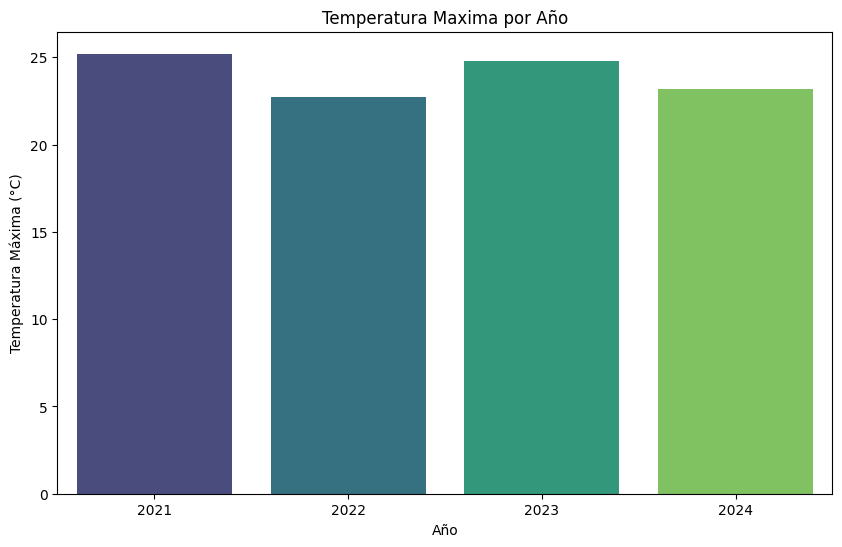


El año con la mayor temperatura máxima fue 2021.0 con 25.20°C.


In [ ]:
# Muestra el año donde mayor temperatura hizo
df['fecha'] = pd.to_datetime(df['fecha'])
df['año'] = df['fecha'].dt.year
max_temp_per_year = df.groupby('año')['temp_max'].max().reset_index()
max_temp_per_year = max_temp_per_year.sort_values(by='temp_max', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='año', y='temp_max', data=max_temp_per_year, palette='viridis')
plt.title('Temperatura Maxima por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura Máxima (°C)')
plt.show()
año_mayor_temp = max_temp_per_year.iloc[0]
print(f"\nEl año con la mayor temperatura máxima fue {año_mayor_temp['año']} con {año_mayor_temp['temp_max']:.2f}°C.")

<ipython-input-10-4128455616>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='año', y='temp_min', data=min_temp_per_year, palette='viridis')


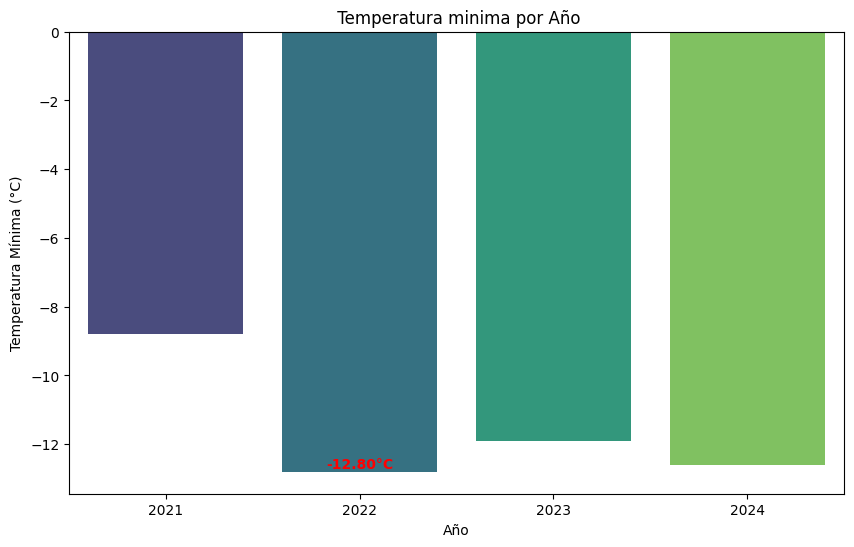


El año con la menor temperatura mínima fue 2022.0 con -12.80°C.


In [ ]:
# Muestra el año donde menor temperatura hizo
min_temp_per_year = df.groupby('año')['temp_min'].min().reset_index()
min_temp_per_year = min_temp_per_year.sort_values(by='temp_min')
plt.figure(figsize=(10, 6))
sns.barplot(x='año', y='temp_min', data=min_temp_per_year, palette='viridis')
plt.title(' Temperatura minima por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura Mínima (°C)')
min_year = min_temp_per_year.iloc[0]['año']
min_temp_value = min_temp_per_year.iloc[0]['temp_min']
plt.text(min_temp_per_year[min_temp_per_year['año'] == min_year].index[0], min_temp_value,
         f'{min_temp_value:.2f}°C', ha='center', va='bottom', color='red', fontweight='bold')
plt.show()
año_menor_temp = min_temp_per_year.iloc[0]
print(f"\nEl año con la menor temperatura mínima fue {año_menor_temp['año']} con {año_menor_temp['temp_min']:.2f}°C.")

####**A partir de la columna fecha, voy a generar nuevas variables que ayuden a capturar la estacionalidad y los patrones temporales que pueden influir en las olas de frío**

In [ ]:
# Convertimos la columna 'fecha' al tipo datetime para poder extraer elementos temporales
df['fecha'] = pd.to_datetime(df['fecha'])

In [ ]:
# Creamos nuevas columnas derivadas de la fecha
df['dia_del_anio'] = df['fecha'].dt.dayofyear
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.weekday

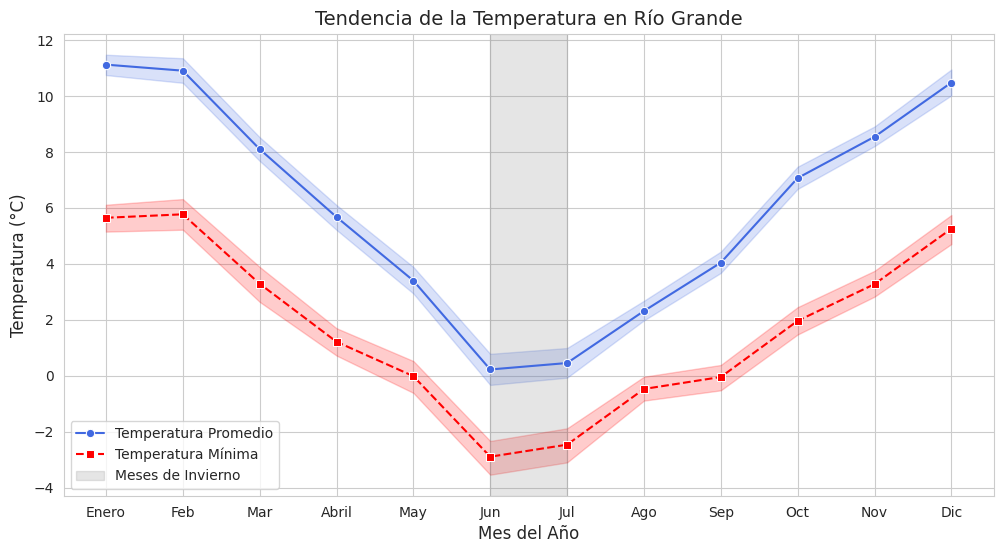

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(x=df["mes"], y=df["temp_promedio"], color="royalblue", marker="o", label="Temperatura Promedio")
sns.lineplot(x=df["mes"], y=df["temp_min"], color="red", linestyle="dashed", marker="s", label="Temperatura Mínima")
plt.axvspan(6, 7, color="gray", alpha=0.2, label="Meses de Invierno")
plt.title("Tendencia de la Temperatura en Río Grande", fontsize=14)
plt.xlabel("Mes del Año", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.xticks(range(1, 13), labels=["Enero", "Feb", "Mar", "Abril", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.legend()
plt.show()


#### El gráfico muestra la evolución mensual de la temperatura promedio y mínima en Río Grande, durante el período 2021–2024. Se observa una marcada estacionalidad térmica, con los valores más bajos concentrados en los meses de invierno (junio y julio). La temperatura promedio desciende gradualmente desde abril hasta alcanzar su punto mínimo en julio, para luego ascender progresivamente hacia la primavera y el verano.

####Continuando con la limpieza, vamos a verificar el numero de outliers que tengan disponibles las variables y saber como tratarlos

In [ ]:
# Seleccionar solo columnas numéricas
columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns

# Calcular IQR para cada columna numérica
Q1 = df[columnas_numericas].quantile(0.25)
Q3 = df[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores atípicos (outliers)
outliers = df[((df[columnas_numericas] < (Q1 - 1.5 * IQR)) | (df[columnas_numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Cantidad total de registros con outliers:", outliers.shape[0])
print("\nOutliers detectados en cada variable:")
for col in columnas_numericas:
    num_outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    print(f"{col}: {num_outliers} outliers")

Cantidad total de registros con outliers: 614

Outliers detectados en cada variable:
temp_max: 0 outliers
temp_min: 10 outliers
temp_promedio: 3 outliers
feelslikemax: 0 outliers
feelslikemin: 27 outliers
feelslike: 0 outliers
punto_rocio: 15 outliers
humedad: 0 outliers
precipitacion: 328 outliers
prob_precipitacion: 0 outliers
cobertura_precipitacion: 53 outliers
nieve: 31 outliers
profundidad_nieve: 107 outliers
rafaga_viento: 6 outliers
viento_velocidad: 5 outliers
direccion_viento: 181 outliers
presion_nivel_mar: 8 outliers
cobertura_nubosa: 2 outliers
visibilidad: 220 outliers
radiacion_solar: 0 outliers
energia_solar: 0 outliers
indice_uv: 0 outliers
fase_lunar: 0 outliers


#### **Dado el contexto climático de Río Grande (zona de vientos intensos y temperaturas mínimas extremas), se decidió conservar los outliers climáticos naturales.**

In [ ]:
# Verifica si hay valores mayores a 100
# como todo esta correcto no es necesario realizar cambios.
print("Valores fuera de rango en cobertura de precipitación:")
print(df[df["cobertura_precipitacion"] > 100][["fecha", "cobertura_precipitacion"]])


Valores fuera de rango en cobertura de precipitación:
Empty DataFrame
Columns: [fecha, cobertura_precipitacion]
Index: []


### Se utilizó el percentil 10 de las temperaturas mínimas como umbral para definir un ‘día frío’

In [ ]:
# Calculamos el percentil 10 de la temperatura mínima para definir un "día frío"
umbral_frio = df['temp_min'].quantile(0.10)
print(f"Umbral para día frío (percentil 10): {umbral_frio:.2f} °C")

Umbral para día frío (percentil 10): -3.80 °C


In [ ]:
# Marcamos con 1 los días cuya temperatura mínima está por debajo del umbral
df['dia_frio'] = (df['temp_min'] < umbral_frio).astype(int)
# Revisa la cantidad de eventos de ola de frío detectados
print(df["dia_frio"].value_counts())


dia_frio
0    1317
1     144
Name: count, dtype: int64


In [ ]:
# Creamos la variable 'ola_frio': 1 si hay al menos 3 días seguidos fríos, 0 si no
df['ola_frio'] = (
    df['dia_frio'].rolling(window=3, min_periods=3).sum() >= 3
).astype(int)


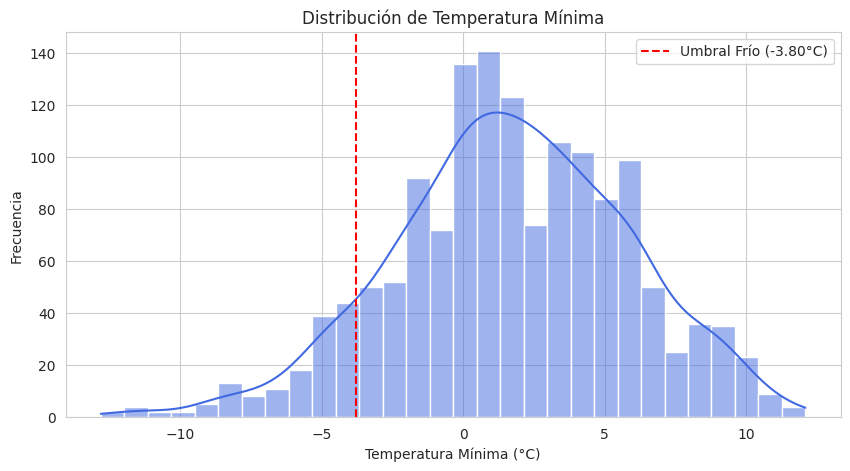

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["temp_min"], bins=30, color="royalblue", kde=True)
plt.axvline(umbral_frio, color="red", linestyle="dashed", label=f"Umbral Frío ({umbral_frio:.2f}°C)")
plt.title("Distribución de Temperatura Mínima")
plt.xlabel("Temperatura Mínima (°C)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


#### El histograma ilustra la distribución de las temperaturas mínimas diarias registradas entre los años 2021 y 2024. Se observa una distribución asimétrica negativa (sesgada a la izquierda), donde la mayoría de los días presentan temperaturas mínimas entre -5 °C y 5 °C.

#### La línea roja punteada representa el umbral utilizado para definir un “día frío”, calculado como el percentil 10 de la temperatura mínima.

##Selección de variables predictoras (X)

In [ ]:
variables_predictoras = [
    'temp_min', 'temp_max', 'temp_promedio',
    'humedad', 'punto_rocio', 'viento_velocidad', 'rafaga_viento',
    'presion_nivel_mar', 'cobertura_nubosa', 'visibilidad',
    'precipitacion', 'cobertura_precipitacion',
    'nieve', 'profundidad_nieve',
    'dia_del_anio', 'mes', 'dia_semana'
]

### Definimos las variables predictoras y la variable objetivo

In [ ]:
# Variables predictoras (features)
X = df[variables_predictoras]

# Variable objetivo (target)
y = df['ola_frio']
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)

Tamaño de X: (1461, 17)
Tamaño de y: (1461,)


## Divido los datos de entrenamiento y prueba
#### 70% de entrenamiento, 15% validacion y 15% para prueba.

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

##### El resultado muestra qué porcentaje del conjunto de entrenamiento pertenece a cada clase (0 y 1) de la variable objetivo 'ola_frio'. Esto es útil para verificar si el conjunto de entrenamiento está equilibrado o si una clase domina sobre la otra.

In [ ]:
y_train.value_counts(normalize=True) * 100


,proportion
ola_frio,
0,96.571988
1,3.428012


## Aplicar SMOTE para balancear el conjunto de entrenamiento

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


#### Aplicar SMOTE me permitio corregir el desbalance de clases, aumentando la representatividad de la clase minoritaria que en este caso es ola_frio = 1.

Distribución antes de aplicar SMOTE: Counter({0: 986, 1: 35})
Distribución después de aplicar SMOTE: Counter({0: 986, 1: 986})


<ipython-input-25-535113694>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Clase 0 Antes", "Clase 1 Antes", "Clase 0 Después", "Clase 1 Después"],


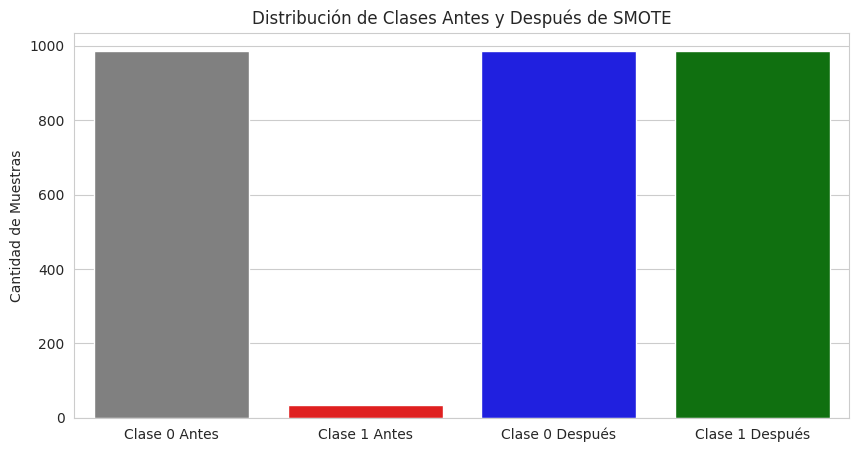

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Ver distribución de clases antes de SMOTE
print("Distribución antes de aplicar SMOTE:", Counter(y_train))

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ver distribución después de SMOTE
print("Distribución después de aplicar SMOTE:", Counter(y_train_resampled))

# Crear gráfico comparativo
plt.figure(figsize=(10,5))
sns.barplot(x=["Clase 0 Antes", "Clase 1 Antes", "Clase 0 Después", "Clase 1 Después"],
            y=[Counter(y_train)[0], Counter(y_train)[1],
               Counter(y_train_resampled)[0], Counter(y_train_resampled)[1]],
            palette=["gray", "red", "blue", "green"])
plt.title("Distribución de Clases Antes y Después de SMOTE")
plt.ylabel("Cantidad de Muestras")
plt.show()


####El grafico indica el antes y despues de haber aplicado la tecnica SMOTE para balancer la clase 0 y clase 1. Denotando que al principio la clase 1, era muy pequeña en comparacion a la clase 0, pero luego de aplicar SMOTE se balancearon ambas columnas.

##  Entrenar Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar árbol de decisión sobre los datos balanceados
modelo_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_dt.fit(X_train_bal, y_train_bal)

# Evaluar sobre validación
y_pred_dt = modelo_dt.predict(X_val)
print("Precision del modelo:",accuracy_score(y_val, y_pred_dt ))
print("Árbol de Decisión - Validación")
print(classification_report(y_val, y_pred_dt))
print("Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred_dt))


Precision del modelo: 0.9454545454545454
Árbol de Decisión - Validación
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       213
           1       0.31      0.57      0.40         7

    accuracy                           0.95       220
   macro avg       0.65      0.76      0.69       220
weighted avg       0.96      0.95      0.95       220

Matriz de Confusión:
[[204   9]
 [  3   4]]


###**Metricas de Árbol de Desición:**

La matriz de confusión indica que el modelo identificó correctamente 4 de los 7 días reales con ola de frío (verdaderos positivos), y falló en 3 ocasiones (falsos negativos). Por otro lado, cometió 9 falsos positivos, es decir, clasificó como “ola de frío” a días que no lo eran. Aunque la precisión global fue alta (94.5%), esto se debe a que la mayoría de los datos pertenecen a la clase 0 (sin ola de frío). En este sentido, el modelo mostró un buen rendimiento en la clase mayoritaria, con un 99% de precisión y 96% de recall para días sin ola.

Sin embargo, su rendimiento sobre la clase minoritaria (ola_frio = 1) fue limitado. El modelo logró un recall del 57%, detectando poco más de la mitad de los eventos de ola de frío, pero con una precisión baja (31%) y un F1-score de apenas 40%. Esto sugiere que, si bien puede detectar algunos eventos extremos, tiende a equivocarse al clasificar otros días como ola de frío cuando no lo son.

Conclusion: El arbol tiene alta excactitud, mostrando que aprende bien los patrones del dataset. Ademas presenta una sensibilidad moderada, indicando que detecta mas de la mitad de los eventos, ademas el modelo presenta una baja precision haciendo que se presenten muchos falsos positivos

###Visualizacion del Arbol del Decision

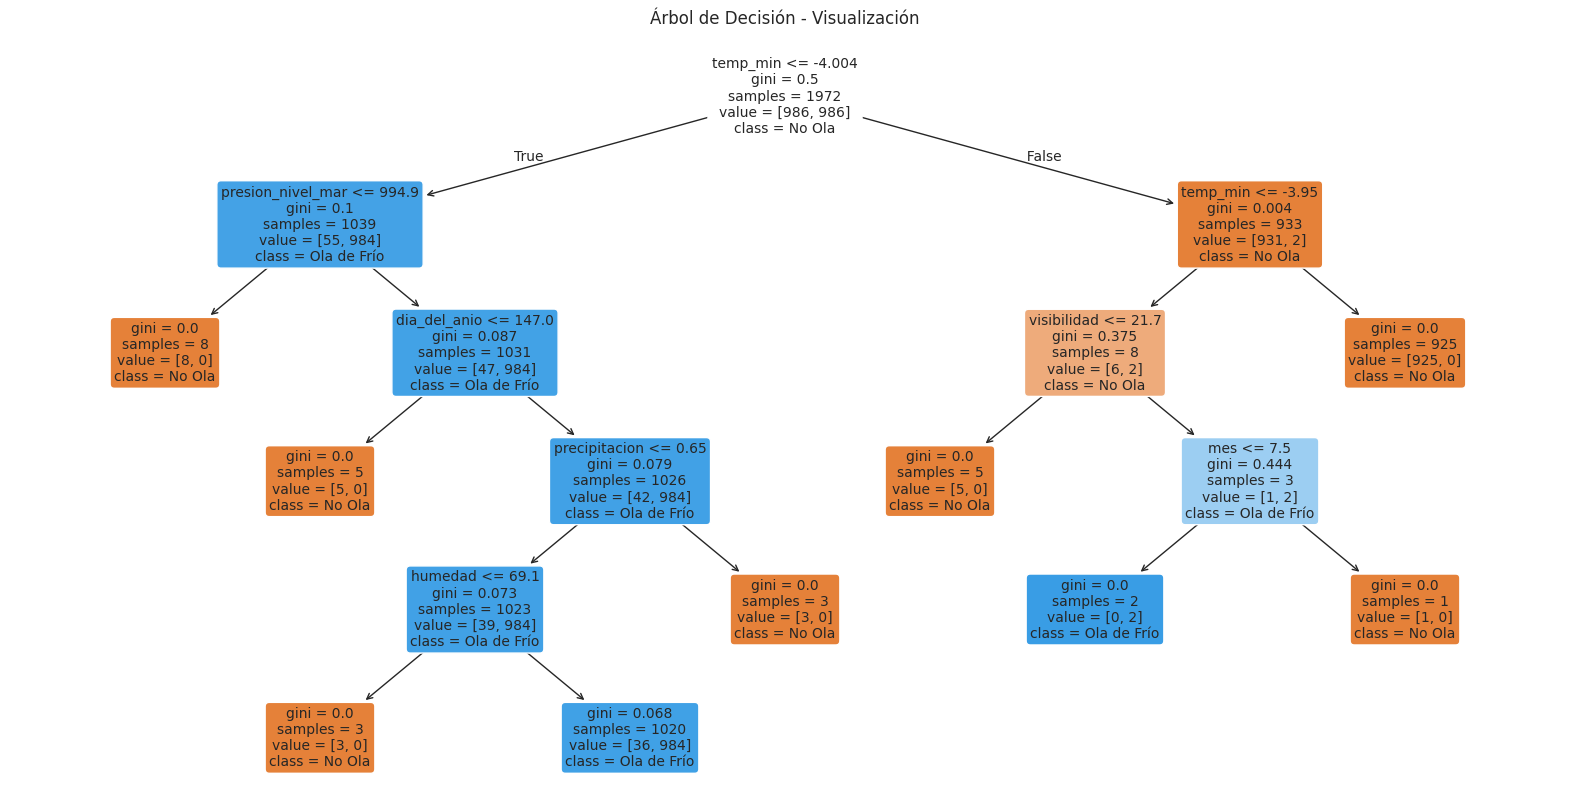

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_dt, feature_names=X_train.columns, class_names=["No Ola", "Ola de Frío"],
          filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión - Visualización")
plt.show()


#### El árbol parte desde la raíz (arriba), dividiendo el conjunto de datos en subgrupos cada vez más específicos, hasta llegar a nodos hoja donde se asigna una clase (No Ola o Ola de Frío). En cada nodo se indican la cantidad de muestras que llegan hasta allí, su distribución por clase, y la predicción más probable.

## Entrenar Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar Random Forest sobre los datos balanceados
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
modelo_rf.fit(X_train_bal, y_train_bal)

# Evaluar sobre validación
y_pred_rf = modelo_rf.predict(X_val)

print("Precision del Modelo Random Forest", accuracy_score(y_val, y_pred_rf))
print("Random Forest - Validación")
print(classification_report(y_val, y_pred_rf))
print("Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred_rf))


Precision del Modelo Random Forest 0.9681818181818181
Random Forest - Validación
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       213
           1       0.50      0.71      0.59         7

    accuracy                           0.97       220
   macro avg       0.75      0.85      0.79       220
weighted avg       0.97      0.97      0.97       220

Matriz de Confusión:
[[208   5]
 [  2   5]]


## **Metricas del Modelo Random Forest**
La matriz de confusión muestra que, de los 7 días reales con ola de frío presentes en el conjunto de validación, el modelo logró identificar correctamente 5 (verdaderos positivos), mientras que 2 fueron clasificados erróneamente como días normales (falsos negativos). Además, hubo 5 falsos positivos: días que no eran ola de frío pero fueron predichos como tales.

A pesar del bajo soporte (solo 7 casos de ola de frío en validación), el modelo demostró una buena capacidad de detección de la clase minoritaria, alcanzando un recall del 71%, lo que implica que pudo identificar la mayoría de los eventos reales de ola de frío. El F1-score de 59% refleja un balance razonable entre precisión y recall en ese contexto. Por otro lado, la clase mayoritaria (ola_frio = 0) obtuvo una precisión del 99% y un recall del 98%, mostrando que el modelo clasifica correctamente la mayoría de los días sin ola de frío.

Estas métricas confirman que el modelo no solo logra un alto rendimiento global, sino que también tiene un comportamiento aceptable en la detección de eventos poco frecuentes, lo cual era uno de los principales desafíos del proyecto. Este rendimiento valida la elección del modelo Random Forest como el más adecuado para la tarea propuesta.

<ipython-input-29-342641141>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancias, palette='viridis')


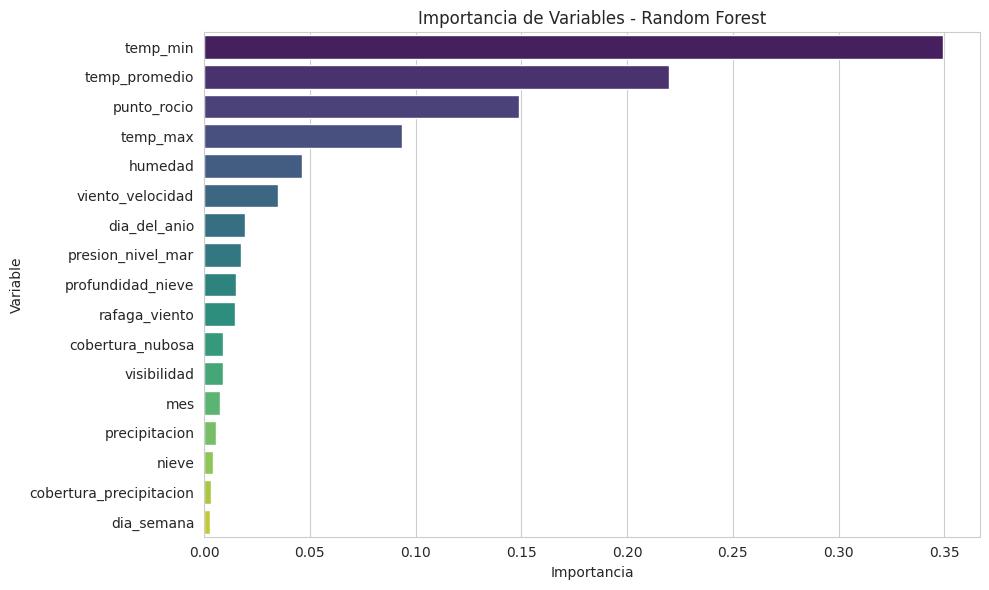

In [ ]:
importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancias, palette='viridis')
plt.title('Importancia de Variables - Random Forest')
plt.tight_layout()
plt.show()


#### El gráfico de barras representa la importancia relativa de cada variable meteorológica dentro del modelo Random Forest. Estas importancias reflejan cuánto contribuye cada variable a las decisiones tomadas por el modelo en los distintos árboles que lo componen.
Entre las más destacadas se encuentran:

- Temperatura mínima (temp_min): principal predictor de días con ola de frío, lo cual valida su uso como base para la definición del evento.

- Temperatura promedio (temp_promedio) y punto de rocío (punto_rocio): relacionadas con condiciones térmicas persistentes.

- Viento (velocidad y ráfagas) y humedad: factores relevantes para la percepción del frío y su duración.

- Día del año (dia_del_anio) y mes: variables temporales que reflejan la estacionalidad del fenómeno.

## Curva ROC que compara modelos con SMOTE y sin SMOTE

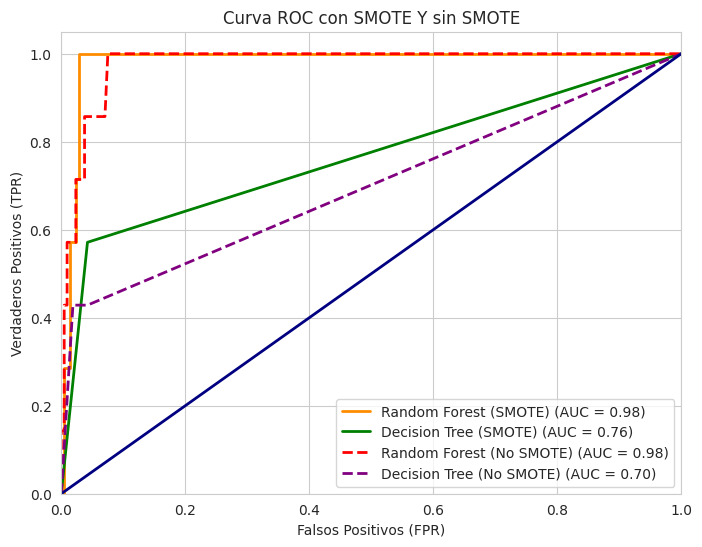

In [ ]:
# Modelos con SMOTE
y_prob_rf_smote = modelo_rf.predict_proba(X_val)[:, 1]
y_prob_dt_smote = modelo_dt.predict_proba(X_val)[:, 1]

# Entrenar los modelos sin SMOTE para la comparación en la curva ROC
# Random Forest sin SMOTE
modelo_rf_no_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
modelo_rf_no_smote.fit(X_train, y_train)
y_prob_rf_no_smote = modelo_rf_no_smote.predict_proba(X_val)[:, 1]

# Decision Tree sin SMOTE
modelo_dt_no_smote = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_dt_no_smote.fit(X_train, y_train)
y_prob_dt_no_smote = modelo_dt_no_smote.predict_proba(X_val)[:, 1]

# Calcular las curvas ROC
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_val, y_prob_rf_smote)
auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)

fpr_dt_smote, tpr_dt_smote, _ = roc_curve(y_val, y_prob_dt_smote)
auc_dt_smote = auc(fpr_dt_smote, tpr_dt_smote)

fpr_rf_no_smote, tpr_rf_no_smote, _ = roc_curve(y_val, y_prob_rf_no_smote)
auc_rf_no_smote = auc(fpr_rf_no_smote, tpr_rf_no_smote)

fpr_dt_no_smote, tpr_dt_no_smote, _ = roc_curve(y_val, y_prob_dt_no_smote)
auc_dt_no_smote = auc(fpr_dt_no_smote, tpr_dt_no_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_smote, tpr_rf_smote, color='darkorange', lw=2, label=f'Random Forest (SMOTE) (AUC = {auc_rf_smote:.2f})')
plt.plot(fpr_dt_smote, tpr_dt_smote, color='green', lw=2, label=f'Decision Tree (SMOTE) (AUC = {auc_dt_smote:.2f})')
plt.plot(fpr_rf_no_smote, tpr_rf_no_smote, color='red', lw=2, linestyle='--', label=f'Random Forest (No SMOTE) (AUC = {auc_rf_no_smote:.2f})')
plt.plot(fpr_dt_no_smote, tpr_dt_no_smote, color='purple', lw=2, linestyle='--', label=f'Decision Tree (No SMOTE) (AUC = {auc_dt_no_smote:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curva ROC con SMOTE Y sin SMOTE')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### El grafico muestra los modelos Arbol de Decision y Random Forest donde se compara si han sido entrenado sin la tecnica de balanceo SMOTE o con la tecnica. Random Forest con SMOTE (línea naranja) presenta la mayor área bajo la curva (AUC), lo que indica un mejor desempeño global. El modelo de Árbol de Decisión con SMOTE (línea verde) mejora respecto a su versión sin balanceo, pero sigue teniendo un rendimiento inferior al Random Forest. En cambio, los modelos entrenados sin SMOTE (líneas punteadas) presentan curvas más cercanas a la diagonal, lo que sugiere un rendimiento más cercano al azar, especialmente en la detección de la clase minoritaria, este caso el modelo Random Forest no tiene una diferencia entre aplicar la tecnica SMOTE

## Comparacion de metricas de Arbol de decision y Random Forest

In [ ]:
# Calculo de metricas par Arbol de Decision
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

# Calculo de métricas para Random Forest
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

#  Tabla comparativa
resultados = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'Precision': [precision_dt, precision_rf],
    'Recall': [recall_dt, recall_rf],
    'F1-Score': [f1_dt, f1_rf]
})

print(resultados.round(3))


              Modelo  Accuracy  Precision  Recall  F1-Score
0  Árbol de Decisión     0.945      0.308   0.571     0.400
1      Random Forest     0.968      0.500   0.714     0.588


##**Análisis Comparativo entre el Arbol de Decision y Random Forest**
#####**Árbol de Decisión**: Obtuvo una alta exactitud de 94.5%, indicando una buena clasificacion general. Menifesto una baja precision del 30.8%, lo que implica que muchas predecciones positvas son incorrectas. Recall con 57.1%, logra captar algunos casos positivos pero no de manera optima. F1-Score obtuvo una puntuacion baja del 40%, reflejando un desequilibrio entre precision y recall.

##### **Random Forest**: obtuvo una mejor exactitud del 96.8%, demostrando una clasificacion mas precisa en comparacion con el Arbol de Decision. La precision fue del 50%, reduciendo falsas alarmas en la clase positiva. Recall alto con 71.4%, lo uqe significa que captura mas casos positivos correctamente. F-1 Score fue superior con 58.8% demostrando mejor rendimiento general en balance entre precision y recall.

## Evaluación final – Random Forest (conjunto de prueba)

####El modelo Random Forest fue elegido para aplicarse al conjunto de prueba porque mostró mayor capacidad de detección de eventos de ola de frío, menor tasa de error y mejor F1-score, lo que lo convierte en una opción más confiable para evaluar su rendimiento en datos reales no vistos.

In [ ]:
# Predecir sobre el conjunto de prueba
y_test_pred = modelo_rf.predict(X_test)

print("Evaluación Final - Random Forest sobre Conjunto de Prueba")
print(classification_report(y_test, y_test_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_test_pred))


Evaluación Final - Random Forest sobre Conjunto de Prueba
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       212
           1       0.60      0.75      0.67         8

    accuracy                           0.97       220
   macro avg       0.80      0.87      0.83       220
weighted avg       0.98      0.97      0.97       220

Matriz de Confusión:
[[208   4]
 [  2   6]]


### **Metrica sobre el conjunto de prueba con Random forest**
En la evaluación final del modelo Random Forest, utilizando el conjunto de prueba independiente, se alcanzó un desempeño muy satisfactorio. La precisión general fue del 97%, y para la clase ola_frio = 1 se obtuvo un recall del 75%, indicando que el modelo pudo detectar la mayoría de los eventos reales de ola de frío.
Además, logró un F1-score de 67%, evidenciando un buen equilibrio entre los aciertos y los errores cometidos al predecir días con ola. Estos resultados validan el modelo como una herramienta confiable para la detección anticipada de olas de frío en la región de estudio.

Matriz de confusion:

- El modelo detectó 6 de 8 olas de frío reales

- Se le escaparon 2 (falsos negativos)

- Detectó 4 días como “ola” que no lo eran (falsos positivos)

- Clasificó correctamente 208 días sin ola

## Conclusion:

#### El modelo desarrollado demuestra una buena capacidad para detectar eventos de ola de frío, lo cual puede ser valioso para aplicaciones preventivas en contextos de clima extremo. Además, el proyecto permitió aplicar herramientas de ciencia de datos, desde la exploración hasta la evaluación crítica del modelo.